# Brats Notebook MIScnn multimodal
This Jupyter notebook will show you how to use the MIScnn Pipeline for image Segmentation. MIScnn is a Medical Image Segmentation with Convolutional Neural Networks and Deep Learning. In our example we will use the Brats MICCAI Brain tumor dataset 2020. In this Notebook we use all MRI scans.

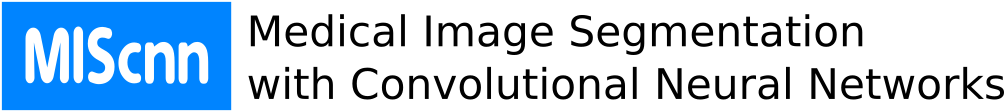
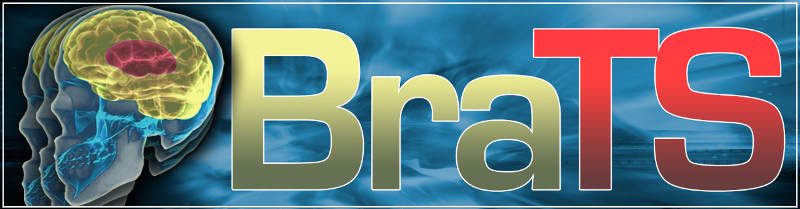

## MIScnn Pipline
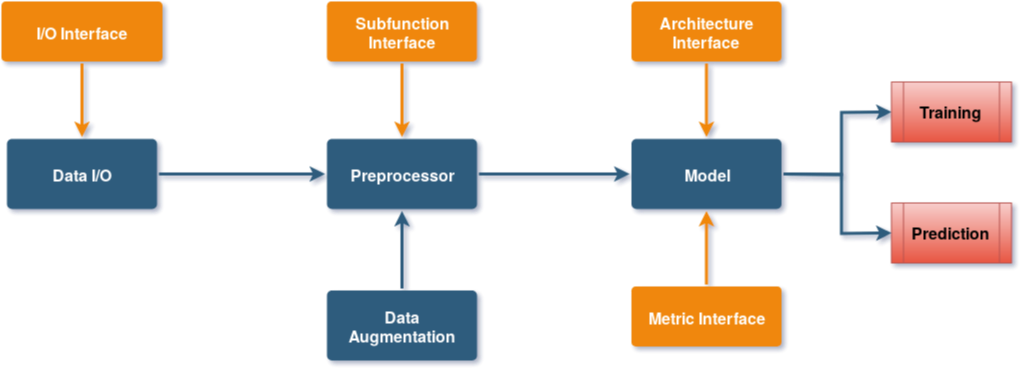

This notebook shows step by step how to implement the MIScnn pipline on the Brats dataset. 
In this example we will do the following steps:

    1. Dataset Prepreation
    2. Data Exploration
    3. MIScnn Pipeline Setup
    4. Training
    5. Prediction
    6. Evaluation

    

# Tensorflow Configurations (optional)
By using the RAM growth option your programm will use a dynamic space of RAM instead of allocating RAM without using it.

In [1]:
import tensorflow as tf

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Dataset Prepreation
The Brats samples ar in NII format. To handle with this format a Data I/O class with an Nifti interface is used.
## Set Filestrucure

### Load samples from orignial Datastructure

In [2]:
# Library import
from miscnn.data_loading.interfaces.nifti_io \
     import NIFTI_interface
from miscnn.data_loading.data_io import Data_IO
import shutil

# Initialize the NIfTI I/O interface and configure the images as one channel (grayscale) and three segmentation classes (background, enhancing, edema, necrotic and non-enhancing)
interface = NIFTI_interface(pattern="BraTS20_Training_[0-9]*", 
                            channels=4, classes=5)

# Specify the Brats data directory
path_dataset = "./data/MICCAI_BraTS2020_TrainingData/"
path_filestructure = "./data/filestructure/"
# Create the Data I/O object 
data_io = Data_IO(interface, path_dataset)
sample_list = data_io.get_indiceslist()
sample_list.sort()
print(sample_list)

['BraTS20_Training_001', 'BraTS20_Training_002', 'BraTS20_Training_003', 'BraTS20_Training_004', 'BraTS20_Training_005', 'BraTS20_Training_006', 'BraTS20_Training_007', 'BraTS20_Training_008', 'BraTS20_Training_009', 'BraTS20_Training_010', 'BraTS20_Training_011', 'BraTS20_Training_012', 'BraTS20_Training_013', 'BraTS20_Training_014', 'BraTS20_Training_015', 'BraTS20_Training_016', 'BraTS20_Training_017', 'BraTS20_Training_018', 'BraTS20_Training_019', 'BraTS20_Training_020', 'BraTS20_Training_021', 'BraTS20_Training_022', 'BraTS20_Training_023', 'BraTS20_Training_024', 'BraTS20_Training_025', 'BraTS20_Training_026', 'BraTS20_Training_027', 'BraTS20_Training_028', 'BraTS20_Training_029', 'BraTS20_Training_030', 'BraTS20_Training_031', 'BraTS20_Training_032', 'BraTS20_Training_033', 'BraTS20_Training_034', 'BraTS20_Training_035', 'BraTS20_Training_036', 'BraTS20_Training_037', 'BraTS20_Training_038', 'BraTS20_Training_039', 'BraTS20_Training_040', 'BraTS20_Training_041', 'BraTS20_Traini

### Set Filestructure

In [3]:
import numpy as np
import nibabel as nib
import os

i=1
for s in sample_list:
    
    path_sample = os.path.join(path_dataset, s)
    path_t1 = os.path.join(path_sample, s + '_t1.nii.gz')
    path_t1ce = os.path.join(path_sample, s + '_t1ce.nii.gz')
    path_t2 = os.path.join(path_sample, s + '_t2.nii.gz')
    path_flair = os.path.join(path_sample, s + '_flair.nii.gz')
    
    t1 = nib.load(path_t1)
    t1 = t1.get_fdata()
    t1 = np.reshape(t1, (240, 240, 155, 1))
   
    t1ce = nib.load(path_t1ce)
    t1ce = t1ce.get_fdata()
    t1ce = np.reshape(t1ce, (240, 240, 155, 1))
    
    t2 = nib.load(path_t2)
    t2 = t2.get_fdata()
    t2 = np.reshape(t2, (240, 240, 155, 1))
    
    flair = nib.load(path_flair)
    flair = flair.get_fdata()
    flair = np.reshape(flair, (240, 240, 155, 1))
    
    fusion = np.concatenate((t1, t2, flair, t1ce), axis=3)
    print(fusion.shape)
    path_fs_sample = os.path.join(path_filestructure, "sample" + f"{i:03}")
    i = i+1
    
    if not os.path.exists(path_fs_sample): os.mkdir(path_fs_sample)
    path_fs_sample_fusion = os.path.join(path_fs_sample , 'imaging.nii.gz')
    fusion = nib.Nifti1Image(fusion, affine=np.eye(4))
    nib.save(fusion, path_fs_sample_fusion)
    
    
    
    #copy seg
    path_ds_sample = os.path.join(path_dataset, s)
    path_ds_sample_seg = os.path.join(path_ds_sample, s + "_seg.nii.gz")
    seg = nib.load(path_ds_sample_seg)
    seg = seg.get_fdata()
    #seg = np.reshape(seg, (240, 240, 155, 1))
    #seg = np.concatenate((seg, seg, seg, seg), axis = 3)
    print(seg.shape)
    path_fs_sample_seg = os.path.join(path_fs_sample, "segmentation.nii.gz")
    seg = nib.Nifti1Image(seg, affine=np.eye(4))
    nib.save(seg, path_fs_sample_seg)
    
    

(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(240, 240, 155)
(240, 240, 155, 4)
(

# MIScnn Pipeline Setup

In [4]:
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# Import some libraries
from miscnn import Data_IO, Preprocessor, Neural_Network
from miscnn.data_loading.interfaces import Image_interface
from miscnn.neural_network.metrics import tversky_crossentropy, dice_soft, \
                                          dice_crossentropy, tversky_loss
from miscnn.processing.subfunctions import Resize, Normalization
# Library import
from miscnn.data_loading.interfaces.nifti_io \
     import NIFTI_interface
from miscnn.data_loading.data_io import Data_IO

# Initialize the NIfTI I/O interface and configure the images as one channel (grayscale) and three segmentation classes (background, kidney, tumor)
interface = NIFTI_interface(pattern="sample[0-9]*", 
                            channels=4, classes=5)

data_path = "./data/filestructure/"
data_io = Data_IO(interface, data_path, delete_batchDir=True)

# Obtain the sample list
sample_list = data_io.get_indiceslist()
sample_list.sort()

# Library imports
from miscnn.processing.subfunctions.normalization import Normalization
from miscnn.processing.subfunctions.clipping import Clipping
from miscnn.processing.subfunctions.resampling import Resampling

# Create a pixel value normalization Subfunction through Z-Score 
sf_normalize = Normalization(mode='z-score')

# Create a resampling Subfunction to voxel spacing 3.22 x 1.62 x 1.62
sf_resample = Resampling((3.22, 1.62, 1.62)) 

# Assemble Subfunction classes into a list
# Be aware that the Subfunctions will be exectued according to the list order!
subfunctions = [sf_normalize, sf_resample]

# Initialize Preprocessor
pp = Preprocessor(data_io, batch_size=2, subfunctions=subfunctions, prepare_subfunctions=True, 
                  prepare_batches=False, analysis="patchwise-crop", patch_shape=(80, 160, 160),
                  use_multiprocessing=True)

# Adjust the patch overlap for predictions
pp.patchwise_overlap = (40, 80, 80)

 # Create the Neural Network model
model = Neural_Network(preprocessor=pp, loss=tversky_loss, metrics=[dice_soft, dice_crossentropy],
                       batch_queue_size=3, workers=5, learninig_rate=0.0001)

In [6]:
# Define Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
cb_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=20, verbose=1, mode='min', min_delta=0.0001, cooldown=1,    
                          min_lr=0.00001)
from tensorflow.keras.callbacks import EarlyStopping
cb_es = EarlyStopping(monitor='loss', min_delta=0, patience=150, verbose=1, mode='min')

# Training

## Cross Validation

In [7]:
# Library import
from miscnn.evaluation.cross_validation import cross_validation
# Run cross-validation function
cross_validation(sample_list[:350], model, k_fold=3, epochs=400, iterations=None,
                 evaluation_path="evaluation", draw_figures=True, callbacks=[cb_lr, cb_es])
model.dump("./multi_model")

Epoch 1/400
117/117 [==============================] - 191s 2s/step - loss: 4.1056 - dice_soft: 0.1800 - dice_crossentropy: 1.0936 - val_loss: 4.0686 - val_dice_soft: 0.1862 - val_dice_crossentropy: 0.9587

Epoch 00001: val_loss improved from inf to 4.06863, saving model to evaluation/fold_0/model.hdf5
Epoch 2/400
117/117 [==============================] - 170s 1s/step - loss: 3.8145 - dice_soft: 0.2353 - dice_crossentropy: 0.8231 - val_loss: 3.7706 - val_dice_soft: 0.2463 - val_dice_crossentropy: 0.8237

Epoch 00002: val_loss improved from 4.06863 to 3.77056, saving model to evaluation/fold_0/model.hdf5
Epoch 3/400
117/117 [==============================] - 171s 1s/step - loss: 3.7114 - dice_soft: 0.2576 - dice_crossentropy: 0.7869 - val_loss: 3.6415 - val_dice_soft: 0.2697 - val_dice_crossentropy: 0.7646

Epoch 00003: val_loss improved from 3.77056 to 3.64146, saving model to evaluation/fold_0/model.hdf5
Epoch 4/400
117/117 [==============================] - 171s 1s/step - loss: 3.65

# Prediction

In [8]:
model.predict(sample_list[351:369])

# Evaluation

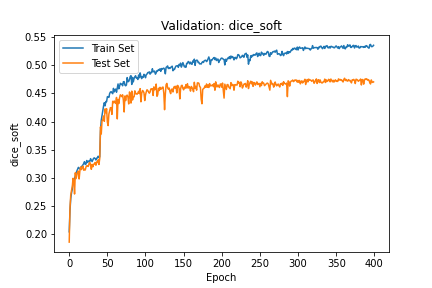

In [9]:
from IPython.display import Image
Image(filename = "evaluation/fold_0/validation.dice_soft.png")

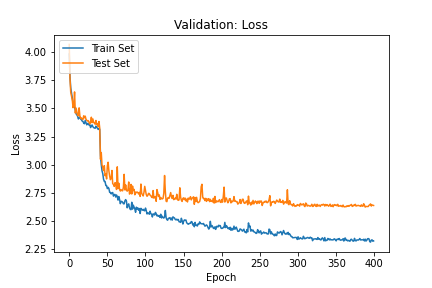

In [10]:
Image(filename = "evaluation/fold_0/validation.loss.png")

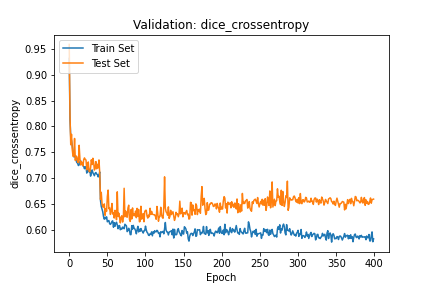

In [11]:
Image(filename = "evaluation/fold_0/validation.dice_crossentropy.png")

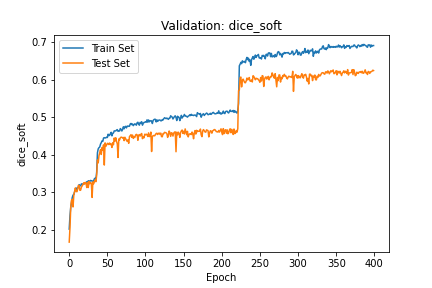

In [12]:
Image(filename = "evaluation/fold_1/validation.dice_soft.png")

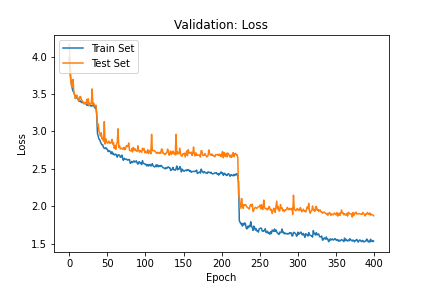

In [13]:
Image(filename = "evaluation/fold_1/validation.loss.png")

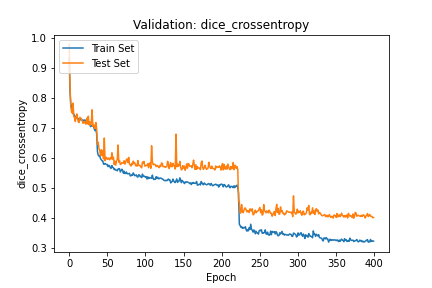

In [14]:
Image(filename = "evaluation/fold_1/validation.dice_crossentropy.png")

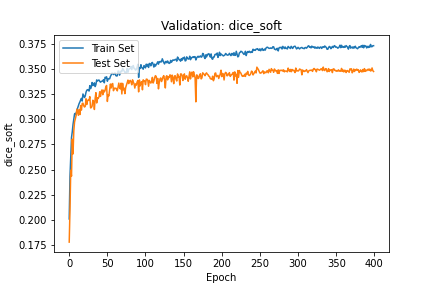

In [15]:
Image(filename = "evaluation/fold_2/validation.dice_soft.png")

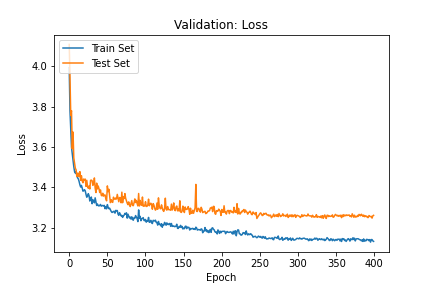

In [16]:
Image(filename = "evaluation/fold_2/validation.loss.png")

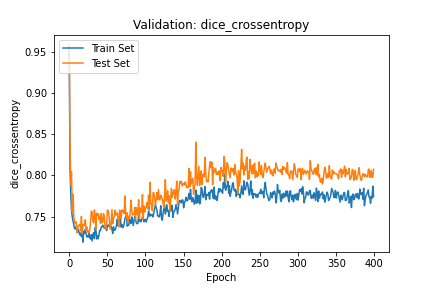

In [17]:
Image(filename = "evaluation/fold_2/validation.dice_crossentropy.png")

In [18]:
from miscnn import Data_IO, Preprocessor, Neural_Network
from miscnn.data_loading.data_io import Data_IO
from miscnn.processing.subfunctions import Resampling, Normalization
from miscnn.data_loading.interfaces.nifti_io \
     import NIFTI_interface

data_path = "./data/filestructure/"

sf_normalize = Normalization(mode='z-score')
sf_resample = Resampling((3.22, 1.62, 1.62))
subfunctions = [sf_normalize, sf_resample]

interface = NIFTI_interface(pattern="sample[0-9]*", 
                            channels=4, classes=5)
data_io = Data_IO(interface, data_path, delete_batchDir=True)
data_path = "./data/filestructure/"
sample_list = data_io.get_indiceslist()
sample_list.sort()

pp = Preprocessor(data_io, batch_size=2, subfunctions=subfunctions, prepare_subfunctions=True, 
                  prepare_batches=False, analysis="patchwise-crop", patch_shape=(80, 160, 160),
                  use_multiprocessing=True)

# Adjust the patch overlap for predictions
pp.patchwise_overlap = (40, 80, 80)


model = Neural_Network(preprocessor=pp)
model.load('./multi_model')

In [19]:
model.predict(sample_list[351:369])

/usr/local/lib/python3.6/dist-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:667: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


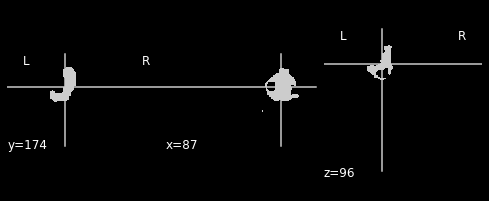

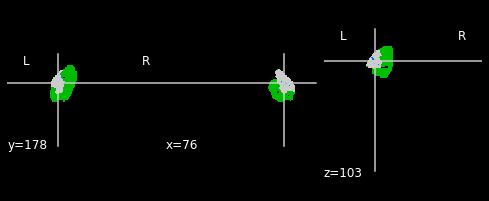

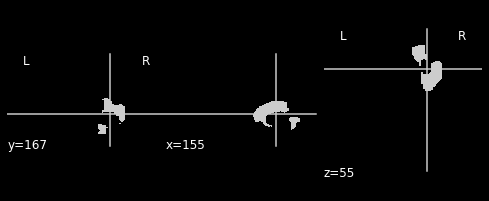

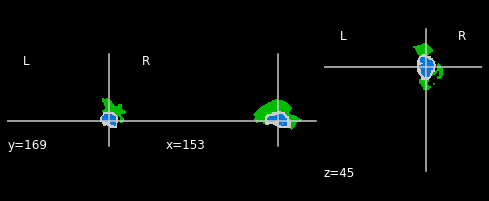

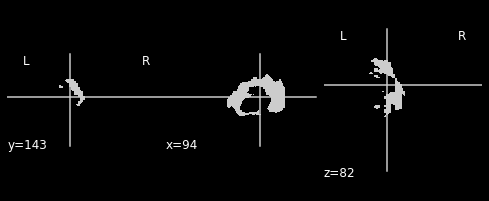

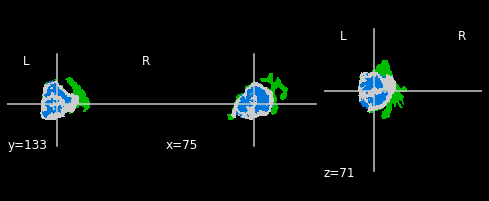

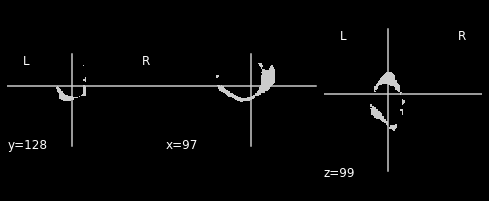

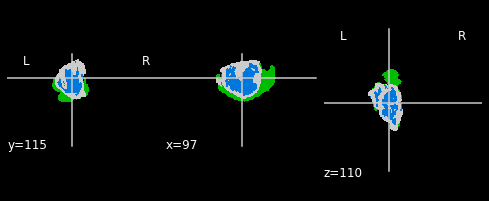

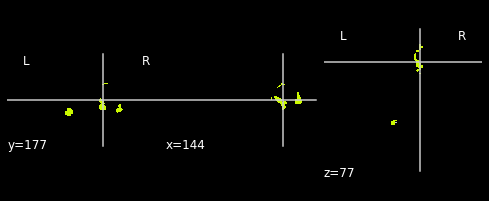

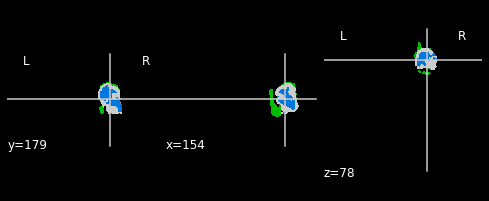

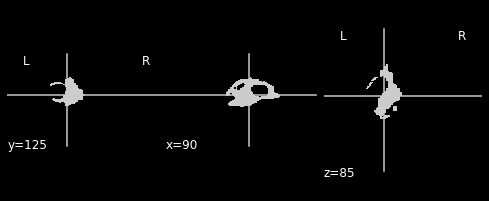

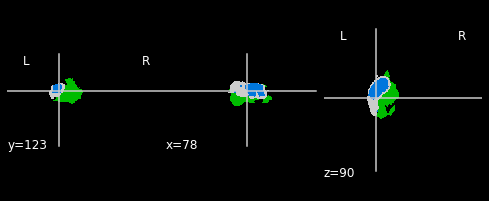

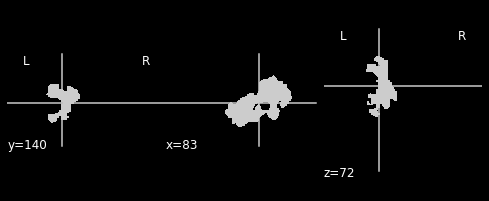

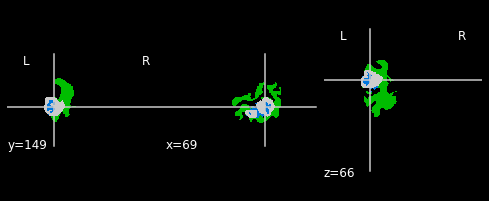

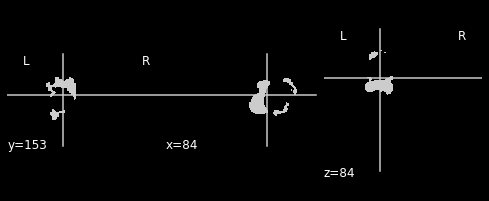

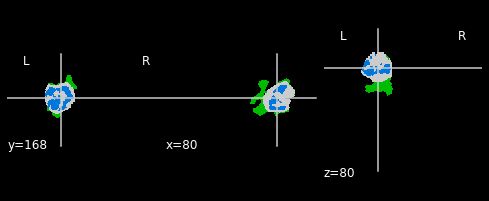

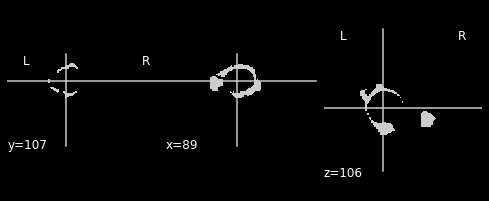

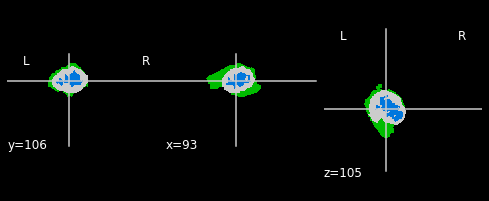

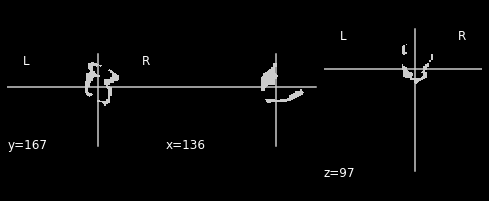

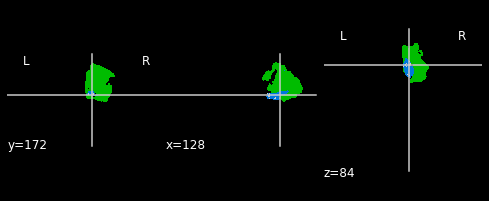

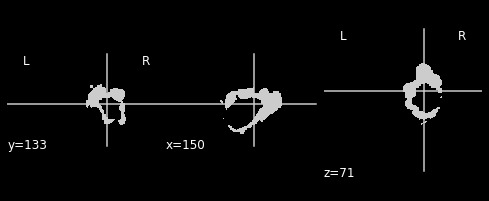

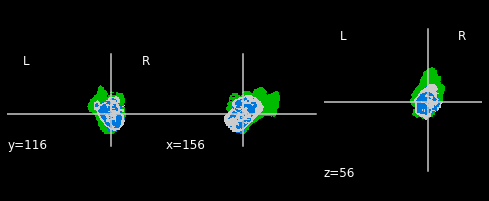

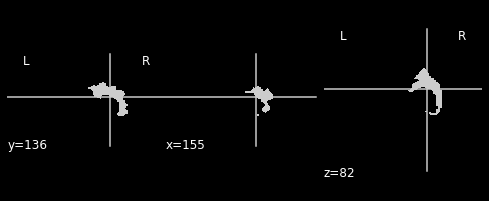

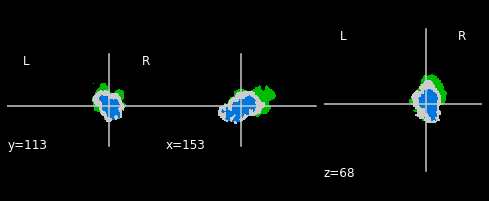

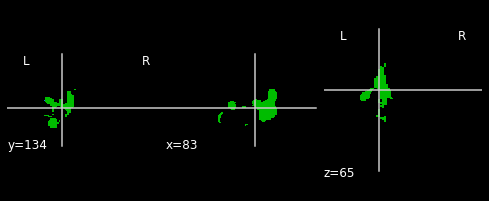

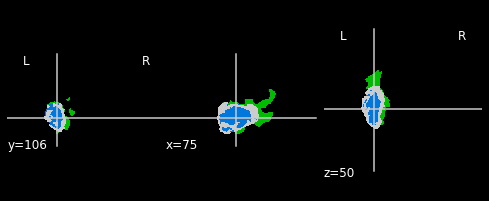

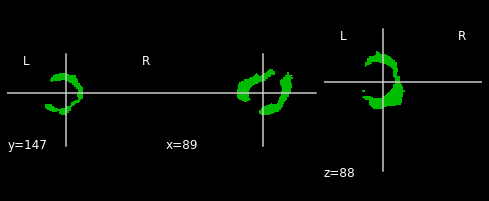

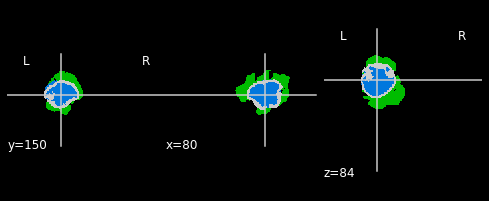

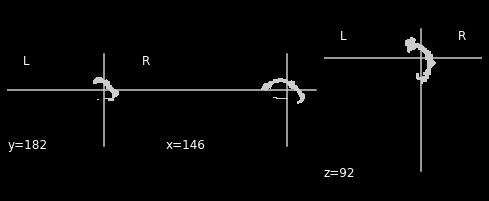

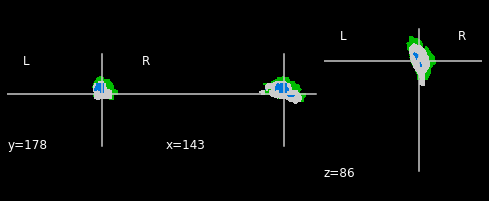

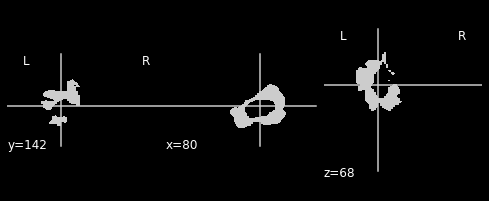

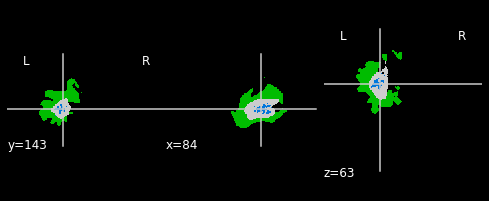

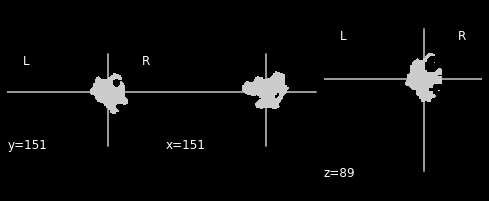

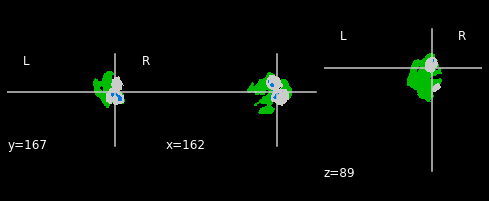

In [20]:
from nilearn.plotting import plot_epi, show
import os
for i in range (352, 369):
    pred_path = "./predictions/sample" + str(i) + ".nii.gz"
    plot_epi(pred_path)
    seg_path = "./data/filestructure/sample" + str(i)+ "/segmentation.nii.gz"
    plot_epi(seg_path)

In [21]:
import numpy as np
from miscnn.data_loading.interfaces.nifti_io \
     import NIFTI_interface
from miscnn.data_loading.data_io import Data_IO
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd


interface = NIFTI_interface(pattern="sample[0-9]*", 
                            channels=1, classes=5)

data_path = "./data/filestructure/"
data_io = Data_IO(interface, data_path, delete_batchDir=True)

sample_data = {}
index=0

for i in range (352, 369):
    sample_data[index] = []
    
    pred = interface.load_prediction("./predictions/sample" + str(i), "./")
    seg = interface.load_segmentation("sample" + str(i))
    pred = pred.ravel()
    seg = seg.ravel()
    print("sample" + str(i) + ": ")
    

    accuracy = np.mean( seg == pred )
    sample_data[index].append(accuracy)
    p_r_f = precision_recall_fscore_support(seg, pred, average='macro', zero_division = 0)
    sample_data[index].append(p_r_f[2])
    
    print("accuracy:" + str(accuracy))
    print("precision:" + str(p_r_f[0]))
    print("sensitivity:" + str(p_r_f[1]))
    print("dice_score:" + str(p_r_f[2]))
    
    p_r_f = precision_recall_fscore_support(seg, pred, average='macro', zero_division = 0, labels = [0.])
    sample_data[index].append(p_r_f[2])
    print("dice score background:" + str(p_r_f[2]))
    
    p_r_f = precision_recall_fscore_support(seg, pred, average='macro', zero_division = 0, labels = [1.])
    sample_data[index].append(p_r_f[2])
    print("dice_score necrotic and non-enhancing tumor core:" + str(p_r_f[2]))
    
    p_r_f = precision_recall_fscore_support(seg, pred, average='macro', zero_division = 0, labels = [2.])
    sample_data[index].append(p_r_f[2])
    print("dice_score peritumoral edema:" + str(p_r_f[2]))
    
    p_r_f = precision_recall_fscore_support(seg, pred, average='macro', zero_division = 0, labels = [4.])
    sample_data[index].append(p_r_f[2])
    print("dice_score GD-enhancing tumor:" + str(p_r_f[2]))
    index = index + 1
    print()

df = pd.DataFrame.from_dict(sample_data, orient="index",
                            columns=["accuracy", "dice overall", "dice background", "dice enhancing tumor",
                                   "dice peritumoral edema", "dice necrotic and non-enhancing tumor core"])
    
print("mean results overall samples:")
print(df.mean(axis=0))

sample352: 
accuracy:0.9976677867383512
precision:0.38303562032241917
sensitivity:0.3594552170419079
dice_score:0.37041137898808596
dice score background:0.9988469294480328
dice_score necrotic and non-enhancing tumor core:0.0
dice_score peritumoral edema:0.8532099654923969
dice_score GD-enhancing tumor:0.0

sample353: 
accuracy:0.9971379928315413
precision:0.43839332008861953
sensitivity:0.4862624415979212
dice_score:0.4596549652263515
dice score background:0.9986042363413592
dice_score necrotic and non-enhancing tumor core:0.0
dice_score peritumoral edema:0.8400156245640469
dice_score GD-enhancing tumor:0.0

sample354: 
accuracy:0.9871303763440861
precision:0.3638218513955101
sensitivity:0.37984070323739605
dice_score:0.3715451106581509
dice score background:0.9936817517531821
dice_score necrotic and non-enhancing tumor core:0.0
dice_score peritumoral edema:0.8640438015375722
dice_score GD-enhancing tumor:0.0

sample355: 
accuracy:0.9883622311827956
precision:0.4620646744755807
sensit

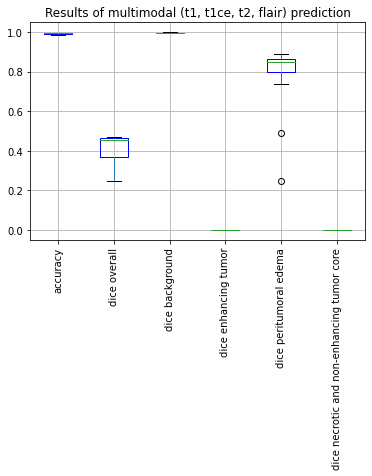

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(rot=90,boxprops=dict(color='blue'))
plt.title("Results of multimodal (t1, t1ce, t2, flair) prediction")
plt.show()